In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('cleaned_heart_disease.csv')

In [4]:
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestrol,fasting blood sugar,resting ecg,max heartrate,exercise induced angina,oldpeak,slope,number of major vessels,thal,heart risk
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### Spliting into features and target

In [5]:
X = df.drop('heart risk', axis=1)
y = df['heart risk']

#### Splitting the data

In [6]:
# importing train_test_split for splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((211, 13), (91, 13), (211,), (91,))

#### Scaling the train and test data

In [7]:
# importing standardscaler for scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[['age', 'resting blood pressure', 'serum cholestrol', 'max heartrate', 'oldpeak']])

X_train[['age', 'resting blood pressure', 'serum cholestrol', 'max heartrate', 'oldpeak']] = scaler.transform(X_train[['age', 'resting blood pressure', 'serum cholestrol', 'max heartrate', 'oldpeak']])
X_test[['age', 'resting blood pressure', 'serum cholestrol', 'max heartrate', 'oldpeak']] = scaler.transform(X_test[['age', 'resting blood pressure', 'serum cholestrol', 'max heartrate', 'oldpeak']])

#### Model creation

In [8]:
# importing Logistic Regression and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

lg_model = LogisticRegression()
                    
lg_model.fit(X_train, y_train)

lg_train_predict = lg_model.predict(X_train)
lg_test_predict = lg_model.predict(X_test)

print('confusion metrics of train data :\n', confusion_matrix(y_train, lg_train_predict))
print('confusion metrics of test data :\n', confusion_matrix(y_test, lg_test_predict))

confusion metrics of train data :
 [[ 69  21]
 [ 10 111]]
confusion metrics of test data :
 [[38 10]
 [ 4 39]]


In [9]:
# training set
train_precision = precision_score(y_train, lg_train_predict)
train_recall = recall_score(y_train, lg_train_predict)
train_f1 = f1_score(y_train, lg_train_predict)

# test set
test_precision = precision_score(y_test, lg_test_predict)
test_recall = recall_score(y_test, lg_test_predict)
test_f1 = f1_score(y_test, lg_test_predict)

metrics = {'Precision': [test_precision, train_precision],
           'Recall': [test_recall, train_recall],
           'F1-Score': [test_f1, train_f1]}
df = pd.DataFrame(metrics, index=['Test','Train'])

print(df)

       Precision    Recall  F1-Score
Test    0.795918  0.906977  0.847826
Train   0.840909  0.917355  0.877470


In [10]:
# importing Decision Tree and evaluation metrics
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
                    
dt_model.fit(X_train, y_train)

dt_train_predict = dt_model.predict(X_train)
dt_test_predict = dt_model.predict(X_test)

print('confusion metrics of train data :\n', confusion_matrix(y_train, dt_train_predict))
print('confusion metrics of test data :\n', confusion_matrix(y_test, dt_test_predict))

confusion metrics of train data :
 [[ 90   0]
 [  0 121]]
confusion metrics of test data :
 [[37 11]
 [ 9 34]]


In [11]:
# importing SVC and evaluation metrics
from sklearn.svm import SVC

svc_model = SVC()
                    
svc_model.fit(X_train, y_train)

svc_train_predict = svc_model.predict(X_train)
svc_test_predict = svc_model.predict(X_test)

print('confusion metrics of train data :\n', confusion_matrix(y_train, svc_train_predict))
print('confusion metrics of test data :\n', confusion_matrix(y_test, svc_test_predict))

confusion metrics of train data :
 [[ 70  20]
 [  7 114]]
confusion metrics of test data :
 [[34 14]
 [ 3 40]]


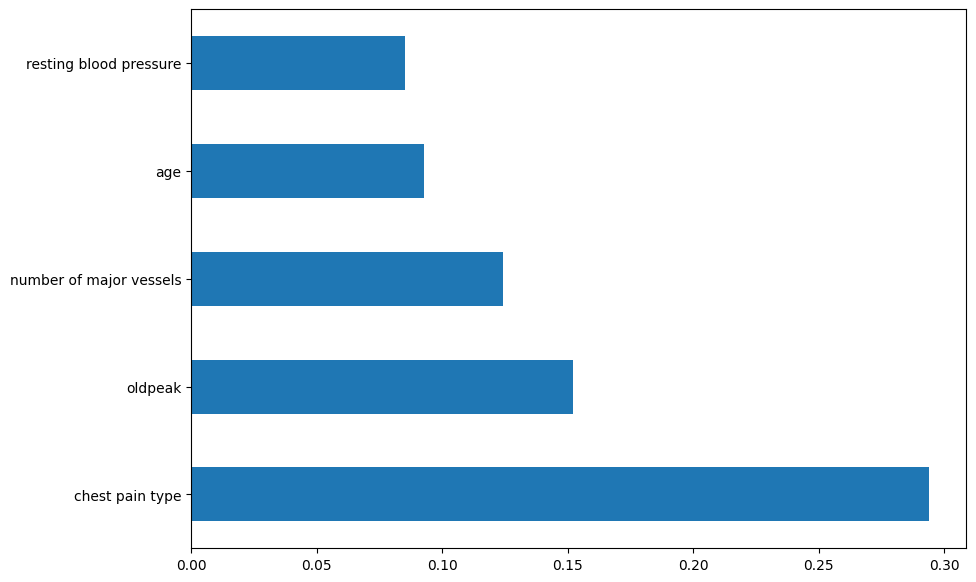

In [12]:
# plot the 7 most important features 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
feat_importances = pd.Series(dt_model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(5).plot(kind='barh');

#### Hyperparameter tuning

In [13]:
# importing randomforest and gridsearchcv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

rf_model = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
rf_model.fit(X_train, y_train)
scores = cross_val_score(rf_model, X_train, y_train, cv=5)
scores.mean()

0.7682170542635658

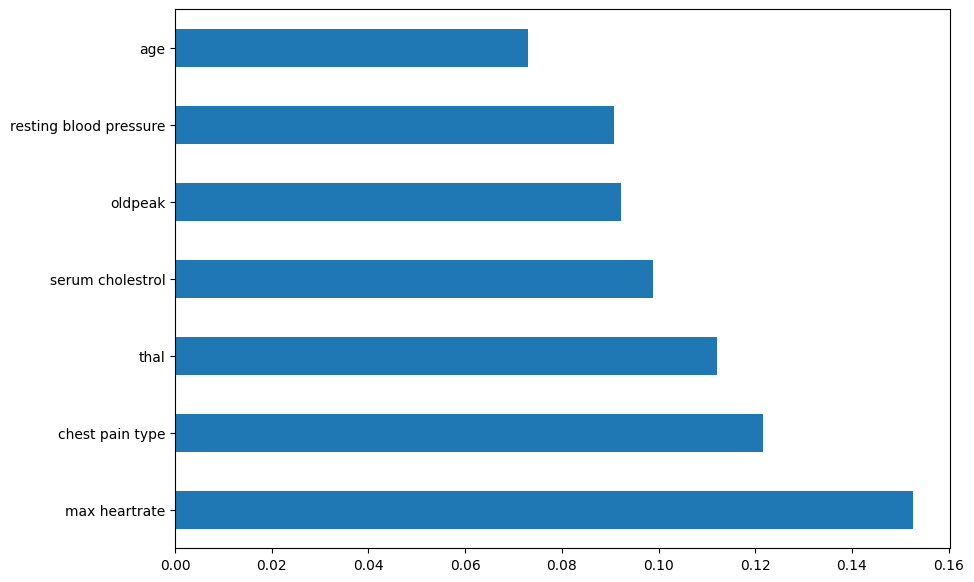

In [14]:
# plot the 7 most important features 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
feat_importances = pd.Series(rf_model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(6).plot(kind='barh');

In [33]:
# Selecting the features that have feature importance

X_train_if = X_train[['max heartrate', 'chest pain type', 'thal', 'serum cholestrol', 'oldpeak', 'resting blood pressure']]
X_test_if = X_test[['max heartrate', 'chest pain type', 'thal', 'serum cholestrol', 'oldpeak', 'resting blood pressure']]

In [34]:
params = {
    'n_estimators' : (5, 10, 15, 20, 50, 100, 200),
    'criterion' : ('gini', 'entropy'), 
    'max_depth' :(5, 10, 15, 20, 25, 30)
}

In [35]:
grid_svc2 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=5, error_score='raise')

In [36]:
grid_svc2.fit(X_train_if, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (5, 10, 15, 20, 25, 30),
                         'n_estimators': (5, 10, 15, 20, 50, 100, 200)})

In [37]:
grid_svc2.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 15}

In [38]:
# creating the tuned model
cv_rf_classifier = RandomForestClassifier(n_estimators=15, max_depth=15, criterion='entropy')
cv_rf_classifier.fit(X_train_if, y_train)

cv_train_predict = cv_rf_classifier.predict(X_train_if)
cv_test_predict = cv_rf_classifier.predict(X_test_if)

print('confusion metrics of train data :\n', confusion_matrix(y_train, cv_train_predict))
print('confusion metrics of test data :\n', confusion_matrix(y_test, cv_test_predict))

confusion metrics of train data :
 [[ 88   2]
 [  0 121]]
confusion metrics of test data :
 [[35 13]
 [ 9 34]]
